# Getting Started
* SAC works with continuous action spaces, but CartPole-v1 has a discrete action space.
* For discrete action spaces, algorithms like DQN, PPO, or A2C are better suited.
* Key Takeaways

    - DQN is ideal for discrete action problems with a small or moderate action space.
    - PPO is more flexible, handling both discrete and continuous actions, making it better for general applications.
    - PPO provides better stability at the cost of higher computational overhead, while DQN is simpler and faster for small problems.

In [ ]:
!pip install gymnasium stable-baselines3 matplotlib numpy
!pip install pygame

### Step 1: Create and Wrap the Environment with Monitor
* Using DQN

DQN (Deep Q-Network)
Analogy: A Treasure Hunter with a Map

Imagine you’re a treasure hunter in a forest. You have a map (the environment) and a guidebook that tells you the estimated value (Q-value) of taking certain paths from different locations. Your goal is to find the most rewarding treasure.

    Q-Values (Value Estimation):
        You estimate how good it is to take a particular path from your current position.
        For example, your guidebook might say:
            "If you go left, the treasure value is 5."
            "If you go right, the treasure value is 8."

    Learning the Best Paths:
        Initially, the guidebook is inaccurate because you haven’t explored much.
        As you explore, you update the guidebook using trial and error:
            If going left turns out to lead to a treasure of 10 (not 5), you revise the value for "left."
        You follow the Bellman equation to improve your estimates over time.

    Exploration vs. Exploitation:
        Sometimes, you follow the current best estimate (exploitation).
        Other times, you try random paths to discover better routes (exploration).

    Key Feature:
        Your strategy is map-based: you rely on the guidebook (Q-values) to decide the best path at every step.

In [46]:
import gymnasium as gym
from stable_baselines3 import DQN
from stable_baselines3.common.monitor import Monitor
import matplotlib.pyplot as plt
import pandas as pd

# Create the CartPole-v1 environment
log_dir = "./logs/"
env = gym.make("CartPole-v1", render_mode="human")
env = Monitor(env, log_dir + "dqn_monitor.csv")

### Step 2: Train the DQN Model

In [ ]:
# Step 2: Train the DQN Model
# DQN is designed for environments with discrete action spaces, making it ideal for CartPole-v1.
print("Training DQN model...")

# Initialize the DQN model
model = DQN("MlpPolicy", env, verbose=1)

# Train the model for 100,000 timesteps
print("Training DQN model...")
model.learn(total_timesteps=100000)

# Save the trained model
model.save("dqn_cartpole")
print("Model saved as 'dqn_cartpole'.")

### Step 3: Test the Model and Visualize

In [ ]:
# Load the trained model
model = DQN.load("dqn_cartpole")

# Test the model
obs, _ = env.reset()
done = False
total_reward = 0

while not done:
    # Predict the action using the trained model
    action, _ = model.predict(obs, deterministic=True)
    
    # Take a step in the environment
    obs, reward, done, *_ = env.step(action)
    total_reward += reward

    # Render the environment
    env.render()

print(f"Total reward: {total_reward}")
env.close()

### Step 4: Visualize Training Rewards

In [ ]:
# Load log data from monitor.csv
log_file = log_dir + "monitor.csv"
log_data = pd.read_csv(log_file, skiprows=1)

# Plot rewards
plt.plot(log_data["r"], label="Episode Reward")
plt.xlabel("Episodes")
plt.ylabel("Rewards")
plt.title("Training Rewards")
plt.legend()
plt.show()

### Train using PPO
### Step 1: Create and Wrap the Environment 
* Using PPO

Analogy: A Professional Athlete Training with a Coach

Imagine you’re a professional athlete learning to master a complex sport (like gymnastics). Instead of relying on a static map, you have a coach who gives you personalized advice (a policy) for every situation. Your goal is to optimize your performance directly.

    Policy (Direct Action Optimization):
        The coach provides you with a strategy (policy) that tells you what move to make in any given scenario.
        For example:
            "When you’re in position A, execute Move B."
            The policy is like your intuition—it's learned directly through practice.

    Learning Through Feedback:
        After each performance, your coach gives feedback:
            "Your move in position A was excellent."
            "Your move in position B could be improved."
        This feedback refines your strategy, ensuring gradual improvement.

    Stability in Updates:
        The coach makes sure your adjustments are small and controlled to avoid overtraining.
        If you try to make drastic changes to your strategy, the coach says:
            "Wait! That’s too big of a change—let’s stick to small, reliable improvements."

    Key Feature:
        Your strategy is intuitive: instead of estimating values, you learn the best actions directly through trial and error.

### Step 2: Train the PPO Model

In [ ]:
from stable_baselines3 import PPO
import matplotlib.pyplot as plt
import pandas as pd

# Initialize PPO model
model = PPO("MlpPolicy", env, verbose=1)

# Train the model
model.learn(total_timesteps=100000)

# Save the trained model
model.save("ppo_cartpole")


### Step 3: Visualize Training Rewards

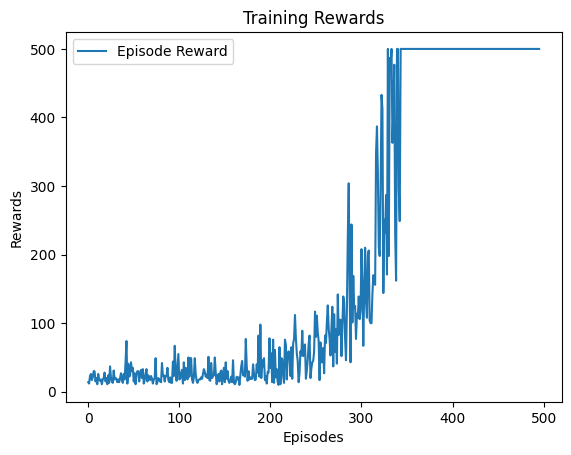

In [4]:
# Load log data from monitor.csv
log_dir = "./logs/"

log_file = log_dir + "ppo_monitor.csv"
log_data = pd.read_csv(log_file, skiprows=1)

# Plot rewards
plt.plot(log_data["r"], label="Episode Reward")
plt.xlabel("Episodes")
plt.ylabel("Rewards")
plt.title("Training Rewards")
plt.legend()
plt.show()

### Step 4: Test the Model and Visualize
* Test Code

In [10]:
# Create the environment
env = gym.make("CartPole-v1", render_mode="human")

# Load the trained model
model = PPO.load("ppo_cartpole")

# Test the model
obs, _ = env.reset()
done, truncated = False, False
total_reward = 0

while not (done or truncated):
    # Predict the action using the trained model
    action, _ = model.predict(obs, deterministic=True)
    
    # Take a step in the environment
    obs, reward, done, truncated, info = env.step(action)
    total_reward += reward

    # Render the environment
    env.render()

print(f"Total reward: {total_reward}")
env.close()

Total reward: 500.0


## Full code implementation

In [5]:
# Load the trained model
from stable_baselines3 import PPO
import gymnasium as gym

# Create the environment
env = gym.make("CartPole-v1", render_mode="human")

# Load the trained model
model = PPO.load("ppo_cartpole")

# Test the model
obs, _ = env.reset()
done, truncated = False, False
total_reward = 0

while not (done or truncated):
    # Predict the action using the trained model
    action, _ = model.predict(obs, deterministic=True)
    
    # Take a step in the environment
    obs, reward, done, truncated, info = env.step(action)
    total_reward += reward

    # Render the environment
    env.render()

# Print total reward after episode ends
print(f"Total reward: {total_reward}")
env.close()


Total reward: 500.0
